# <center>Day 5: network equilibria</center>
### <center>Alfred Galichon (NYU)</center>
## <center>'math+econ+code' masterclass on equilibrium transport and matching models in economics</center>
<center>© 2020 by Alfred Galichon.  Support from  NSF DMS-1716489 and ERC CoG-866274 EQUIPRICE grants is acknowledged.</center>

#### <center>with Python code</center>

**If you reuse code from this masterclass, please cite as:**<br>
Alfred Galichon, 'math+econ+code' masterclass on equilibrium transport and matching models in economics, June 2020. https://github.com/math-econ-code/mec_equil


# References

## Textbooks

* Dimitri Bertsekas (1998). *Network Optimization: Continuous and Discrete Models (Optimization, Computation, and Control)*. Athena Scientific.

* Alfred Galichon (2016). *Optimal transport methods in economics*. Princeton.

## Papers

* Boeing, G. 2017. "OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks." *Computers, Environment and Urban Systems* 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

# Network flow problem


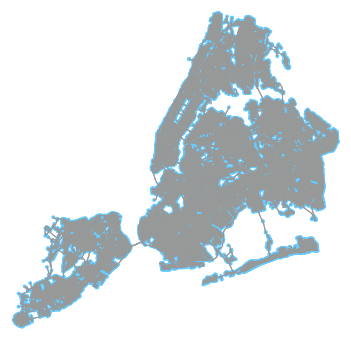

(<Figure size 435.053x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d135998348>)

In [8]:
import networkx as nx
import osmnx as ox
NY = ox.graph_from_place('New York, NY', network_type = 'drive')
ox.plot_graph(ox.project_graph(NY))

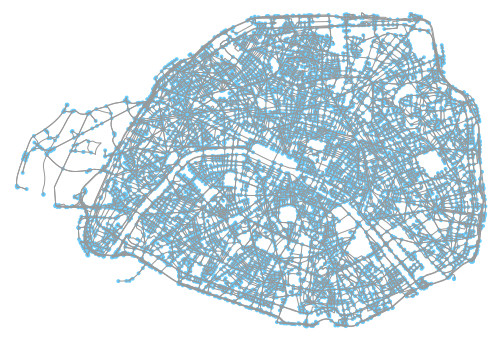

(<Figure size 629.512x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d13dd7e5c8>)

In [7]:
import networkx as nx
import osmnx as ox
G = ox.graph_from_place('Paris, France', network_type = 'drive')
ox.plot_graph(ox.project_graph(G))

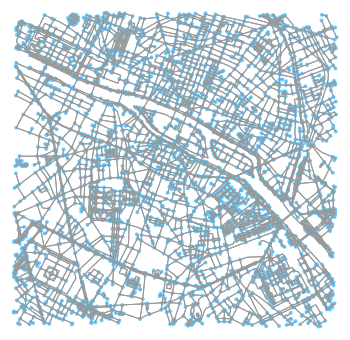

(<Figure size 433.497x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d13db6c608>)

In [9]:
nyu_address='57 boulevard Saint-Germain, 75005 Paris, France'
scpo_address='27 rue Saint-Guillaume, 75007 Paris, France'
Gbis = ox.graph.graph_from_address(nyu_address, dist=2000,network_type = 'walk')
ox.plot_graph(ox.project_graph(Gbis))

In [11]:
nyu_coord  = ox.geocode(nyu_address)
scpo_coord = ox.geocode(scpo_address)
print(nyu_coord,scpo_coord)

(48.8503201, 2.346987) (48.854141, 2.328387)


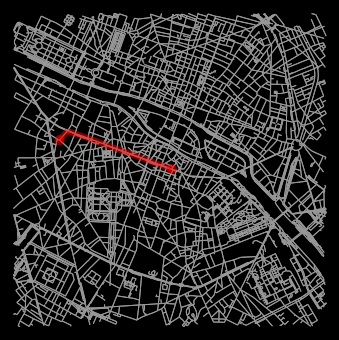

In [12]:
Gbis = ox.add_edge_speeds(Gbis)
Gbis = ox.add_edge_travel_times(Gbis)

nyu_coord  = ox.geocode(nyu_address)
scpo_coord = ox.geocode(scpo_address)
orig = ox.get_nearest_node(Gbis, nyu_coord)
dest = ox.get_nearest_node(Gbis, scpo_coord)
route = nx.shortest_path(Gbis, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(Gbis, route, route_linewidth=6, node_size=0, bgcolor='k')


In [13]:
edge_lengths = ox.utils_graph.get_route_edge_attributes(Gbis, route, 'length')
sum(edge_lengths) # length of the route in meters

1571.906

In [14]:
import numpy as np
arc_list = list(G.edges)
node_list = list(G.nodes)
nbNodes = len(node_list)
nbArcs=len(arc_list)

In [15]:
nbNodes

10031

In [16]:
nbArcs

19563

In [17]:
import numpy as np
arc_list = list(G.edges)
node_list = list(G.nodes)
nbNodes = len(node_list)
nbArcs=len(arc_list)

node_keys = np.zeros(nbNodes,dtype = 'int64')
arcs = np.zeros((nbArcs,3),dtype = 'int64')

(_, nbDiffNodes) = np.unique(node_keys, return_counts=True)
if nbDiffNodes != nbNodes :
    raise Exception("Problem with node indexing.")



for z in range(nbNodes):
    node_keys[z] = node_list[z]

for a in range(nbArcs):
    orig_key = arc_list[a][0]
    dest_key = arc_list[a][1]
    arcs[a,0] = np.where(node_keys ==  orig_key)[0] # origin of arc a
    arcs[a,1] = np.where(node_keys == dest_key)[0] # destination of arc a
    arcs[a,2] = G[orig_key][dest_key][0]["length"] # length of arc a



In [20]:
dest

25253720

In [22]:
np.where(node_keys==dest)[0]

array([7059], dtype=int64)